In [39]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch,Rectangle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d

plt.rcParams["figure.figsize"] = [10, 10]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,arccos,linspace,array,arange,meshgrid,abs,arcsin

from scipy.integrate import quad,dblquad,tplquad

## One-minute Review

A homework question asked about an integral of the form 

$$ \int_0^1\int_0^z\int_z^1 f\,dx\,dy\,dz $$

In [2]:
@interact(angle=(-0,90,6),a=(0.,1.,.05))
def _(angle=-24,vangle=(0,90,6),a=0):
    fig = plt.figure(figsize=(10,10))
    ax= fig.add_subplot(111,projection='3d')
    u = np.linspace(0,1,80)
    v = np.linspace(0,1,80)
    U,V = np.meshgrid(u,v)
    X = U
    Y = V
    Z = np.ones_like(U)
#     ax.plot_wireframe(X,Y,Z,rcount=20,ccount=20)
#     ax.plot_surface(X,Y,0*X,rcount=20,ccount=20,color='gray',alpha=.4)
    ax.view_init(vangle,angle)
    
    ax.plot_wireframe(U,V*(U),U,rcount=20,ccount=20,alpha=a)
    ax.plot_wireframe(U*0+1,V*(U),U,rcount=20,ccount=20,alpha=a)
    ax.plot_wireframe(U+V*(1-U),U,U,rcount=20,ccount=20,alpha=a)
    ax.plot_surface(U,0*X,V*(U),rcount=20,ccount=20,color='gray',alpha=.4)
    ax.plot_surface(U*0,U,U+V*(1-U),rcount=20,ccount=20,color='gray',alpha=.4)

    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(IntSlider(value=0, description='angle', max=90, step=6), IntSlider(value=42, description…

# Cylindrical/Spherical Coordinates

### Quick Exercise

We know the equations $x=1$, $y=1$, and $z=1$ represent planes perpendicular to the respective access. Identify each of the following sets in the new coordinates.

  1. $r=1$
  2. $\theta = 1$
  3. $\rho = 1$
  4. $\phi = 1$

In [3]:
@interact
def _(angle=(-90,90,6),coord=['r','theta','rho','phi']):
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    ax.view_init(30,angle)
    u = v = np.linspace(0,1,100)
    u,v = np.meshgrid(u,v)
    if coord == 'r':
        ax.plot_surface(cos(2*pi*v),sin(2*pi*v),2*u-1,alpha=.5)
    elif coord == 'theta':
        ax.plot_surface(sqrt(2)*v*cos(1),sqrt(2)*v*sin(1),2*u-1,alpha=.5)
    elif coord == 'rho':
        ax.plot_surface(sin(pi*u)*cos(2*pi*v),sin(pi*u)*sin(2*pi*v),cos(pi*u),alpha=.5)
    elif coord == 'phi':
        ax.plot_surface(sin(1)*u*cos(2*pi*v),sin(1)*u*sin(2*pi*v),cos(1)*u,alpha=.5)
    ax.plot([-1,1],[0,0],[0,0],'k',lw=3)
    ax.plot([0,0],[-1,1],[0,0],'k',lw=3)
    ax.plot([0,0],[0,0],[-1,1],'k',lw=3)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(IntSlider(value=0, description='angle', max=90, min=-90, step=6), Dropdown(description='…

## Exercise

Each row of the table below represents a point in $\mathbb{R}^3$. Fill in the missing values.

<table>
    <hr>
    <td> $x$ </td>    <td> $y$ </td>    <td> $z$ </td>
    <td> $r$ </td>    <td> $\theta$ </td>    <td> $\rho$ </td>    <td> $\phi$ </td>
    </hr>
    <tr>
    <td> $2$ </td>    <td> $2$ </td>    <td> $2$ </td>
    <td> $2\sqrt{2}$  </td>   <td> $\pi/4$ </td>    <td> $2\sqrt{3}$ </td>    <td> $\cos^{-1}(1/\sqrt{3})$ </td>
    </tr>
    <tr>
    <td> $-3/2$  </td>    <td> $0$  </td>    <td> $2$ </td>
    <td> $3/2$ </td>    <td> $\pi$ </td>    <td> $5/2$ </td>    <td> $\cos^{-1}(4/5)$ </td>
    </tr>
    <tr>
    <td> $\sqrt{3}/2$ </td>    <td> 
    $1/2$</td>    <td> $-1$ </td>
    <td> $1$ </td>    <td> $\pi/6$ </td>    <td> $\sqrt{2}$ </td>    <td> $3\pi/4$</td>
    </tr>
    <tr>
    <td> $5$ </td>    <td> $1$ </td>    <td> $-\sqrt{26/3}$ </td>
    <td> $\sqrt{26}$ </td>    <td> $\tan^{-1}(1/5)$ </td>    <td> $2\sqrt{26/3}$ </td>    <td> $2\pi/3$ </td>
    </tr>
</table>

## Latitude/Longitude

The surface of the earth is [roughly](https://en.wikipedia.org/wiki/Figure_of_the_Earth#/media/File:Earth_oblateness_to_scale.svg) a sphere. 

Longitude measures degrees east (+) or west (-) from the Greenwich meridiean (a line from the North Pole to the South Pole through Greenwich, England). Latitude measures degrees north (+) or south (-) of the equator. 

#### Quick questions

How would you relate these to our definitions of $\phi$ and $\theta$?

Using this, what are the spherical coordinates of Morningside Heights?

Where is the point on earth where $\phi = \frac\pi4 = -\theta$?

## Example

Find, in terms of constant $a>0$, the centroid of the solid region

$$ 0 \leq z \leq a^2 - x^2 - y^2.$$

In [105]:
@interact
def _(angle=(0,90,6)):
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    ax.view_init(angle,30)
    u = v = np.linspace(0,1,100)
    u,v = np.meshgrid(u,v)

    ax.plot_surface(sqrt(2)*u*cos(2*pi*v),sqrt(2)*u*sin(2*pi*v),2*(1-u**2),alpha=.5)
    ax.plot_wireframe(sqrt(2)*u*cos(2*pi*v),sqrt(2)*u*sin(2*pi*v),2*(1-u**2),color=(.3,.3,.3),rcount=10,ccount=10)

    ax.plot([-1,1],[0,0],[0,0],'k',lw=3)
    ax.plot([0,0],[-1,1],[0,0],'k',lw=3)
    ax.plot([0,0],[0,0],[0,2],'k',lw=3)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(IntSlider(value=42, description='angle', max=90, step=6), Output()), _dom_classes=('widg…

#### Solution

$\bar x = \bar y = 0$ by symmetry. Treating the density as 1, we compute the volume

$$V = \int_0^{2\pi}\int_0^a\int_0^{a^2 - r^2} r \,dz\,dr\,d\theta = 2\pi a^4/4$$

$$\bar z = \frac1V \int_0^{2\pi}\int_0^a\int_0^{a^2 - r^2} z r \,dz\,dr\,d\theta $$

$$ = \frac{\pi a^6/6}{\pi a^4/2} = \frac{a^2}{3} $$

## Example

Find the mass of a right cone with height $h$ and radius (at base) $R$. and uniform density $\rho$.

In [104]:
@interact
def _(angle=(0,90,6)):
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    ax.view_init(angle,30)
    u = v = np.linspace(0,1,100)
    u,v = np.meshgrid(u,v)

    ax.plot_surface(sin(1)*u*cos(2*pi*v),sin(1)*u*sin(2*pi*v),2-2*u,alpha=.5)
    ax.plot_wireframe(sin(1)*u*cos(2*pi*v),sin(1)*u*sin(2*pi*v),2-2*u,color=(.3,.3,.3),rcount=10,ccount=10)

    ax.plot([-1,1],[0,0],[0,0],'k',lw=3)
    ax.plot([0,0],[-1,1],[0,0],'k',lw=3)
    ax.plot([0,0],[0,0],[0,2],'k',lw=3)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(IntSlider(value=42, description='angle', max=90, step=6), Output()), _dom_classes=('widg…

<br>
<div style="background:#cfcfee">**Caution!** When doing these sorts of applications, do not confuse the density $\rho$ with the polar coordinate $\rho$. Choose variables wisely.</div>

Find the moment of inertia relative to its central axis. 

#### Solution

$$ M = \int_0^{2\pi} \int_0^R \int_0^{h-\frac{h}{R}r} \rho r\,dz\,dr\,d\theta = \frac\pi3 R^2h\rho$$

$r$ is the distance to the $z$-axis, so we are just integrating $r^2$. 

$$ I = \int_0^{2\pi} \int_0^R \int_0^{h-\frac{h}{R}r} \rho r^3\,dz\,dr\,d\theta = \frac{\pi R^{4} h \rho}{10} = \frac{3}{10}MR^2 $$

## Example

Find the centroid of a solid quarter-sphere of radius $R$ and uniform density.

In [6]:
@interact
def _(angle=(-45,135,6),vangle=(0,90,6)):
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    ax.view_init(vangle,angle)
    u = v = np.linspace(0,1,100)
    u,v = np.meshgrid(u,v)

    ax.plot_wireframe(sin(pi*u)*cos(pi/2*v),sin(pi*u)*sin(pi/2*v),cos(pi*u),alpha=.8,rcount=20)
    ax.plot_surface(v*sin(pi*u)*cos(pi/2),v*sin(pi*u)*sin(pi/2),v*cos(pi*u),alpha=.3,color='g')
    ax.plot_surface(v*sin(pi*u)*cos(0),v*sin(pi*u)*sin(0),v*cos(pi*u),alpha=.3,color='g')
    ax.plot([-1,1],[0,0],[0,0],'k',lw=3)
    ax.plot([0,0],[-1,1],[0,0],'k',lw=3)
    ax.plot([0,0],[0,0],[-1,1],'k',lw=3)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(IntSlider(value=45, description='angle', max=135, min=-45, step=6), IntSlider(value=42, …

#### Solution

$$\bar x = \frac1V\int_0^{\pi/2}\int_0^\pi\int_0^R (\rho \sin\phi\cos \theta)\rho^2\sin\phi \,d\rho\,d\phi\,d\theta $$

$$ = \frac1V\left(\int_0^{\pi/2}\cos \theta\,d\theta\right)\left(\int_0^\pi \sin^2\phi \,d\phi\right)\left( \int_0^R \rho^3\,d\rho \right) = \frac{1}{\pi R^3/3} (1)(\pi/2)(R^4/4)$$

$$(\bar x,\bar y,\bar z) = \left( \frac38 R,\frac38 R,0\right)$$

## Example

Find the moment of inertia of a solid sphere of radius $R$ relative to a central axis.

The **radius of gyration** of a body is the distance from the axis of a point-mass with the same mass and moment of inertia. Find it for a sphere.

In [7]:
@interact
def _(angle=(0,90,6)):
    tilt = 23.5*pi/180
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    ax.view_init(angle,30)
    u = v = np.linspace(0,1,100)
    u,v = np.meshgrid(u,v)

    ax.plot_wireframe(sin(pi*u)*cos(2*pi*v),sin(pi*u)*sin(2*pi*v),cos(pi*u),alpha=1,rcount=12,ccount = 20)
    ax.plot_surface(sin(pi*u)*cos(2*pi*v),sin(pi*u)*sin(2*pi*v),cos(pi*u),alpha=.2,color='g')
    ax.plot([-1,1],[0,0],[0,0],'k',lw=3)
    ax.plot([0,0],[-1,1],[0,0],'k',lw=3)
    ax.plot([0,0],[0,0],[-1,1],'k',lw=3)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(IntSlider(value=42, description='angle', max=90, step=6), Output()), _dom_classes=('widg…

Consider the density to be 1.

$$M = \frac43 \pi R^3 $$

The distance to the $z$-axis is $r=\rho\sin\phi$.

$$ I = \int_0^{2\pi} \int_0^\pi \int_0^R (\rho \sin\phi)^2\rho^2\sin\phi\,d\rho\,d\phi\,d\theta $$ 

$$= \frac{8\pi R^5}{15} = \frac25 M R^2 $$

So the radius of gyration is $\displaystyle R_g = \sqrt{\frac{I}{M}} = \sqrt{\frac25}R$.

## Example

The Earth has a mass of roughly $6\times10^{24}$ kg. Assuming it's uniformly dense, what is the mass of the portion above the arctic circle ($66.5^\circ$N)?

In [36]:
@interact
def _(angle=(0,90,6)):
    tilt = 23.5*pi/180
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    ax.view_init(angle,30)
    u = v = np.linspace(0,1,100)
    u,v = np.meshgrid(u,v)

    ax.plot_wireframe(sin(tilt*u)*cos(2*pi*v),sin(tilt*u)*sin(2*pi*v),cos(tilt*u),alpha=1,rcount=10,ccount = 5)
    ax.plot_wireframe(sin((1-u)*tilt + pi*u)*cos(2*pi*v),sin((1-u)*tilt + pi*u)*sin(2*pi*v),cos((1-u)*tilt + pi*u),rcount=10,ccount = np.ceil(5*(pi-tilt)/tilt),alpha=.2)
    ax.plot_surface(sin(tilt*u)*cos(2*pi*v),sin(tilt*u)*sin(2*pi*v),0*u + cos(tilt),alpha=.3,color='g')
    ax.plot([-1,1],[0,0],[0,0],'k',lw=3)
    ax.plot([0,0],[-1,1],[0,0],'k',lw=3)
    ax.plot([0,0],[0,0],[-1,1],'k',lw=3)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(IntSlider(value=42, description='angle', max=90, step=6), Output()), _dom_classes=('widg…

Let $R$ be the radius of the Earth, and let $$\alpha = 23.5^\circ = 23.5\frac{\pi}{180}$$ be ite tilt. 

We compute the volume of this polar "cap":

$$V = \int_0^{2\pi}\int_0^\alpha \int_{\frac{R\cos\alpha}{\cos\phi}}^R \rho^2\sin\phi \,d\rho\,d\phi\,d\theta$$

To better see where the $\rho$ bounds came from, observe the following "slice" of the picture for a fixed $\theta$. 

In [88]:
@interact
def _(phi=(0,alpha,.01)):
    t = linspace(-alpha,alpha,60)
    plt.figure(figsize = (6,6.6))
    plt.fill(sin(t),cos(t),fc=(0,1,.4,.2),ec=(0,0,.5),lw=2)
    plt.xlim(-.5,.5)
    plt.ylim(0,1.1)
    plt.plot([-sin(alpha),0,sin(alpha)],[cos(alpha),0,cos(alpha)],lw=1,color='k');
    plt.plot([0,0],[0,1],lw=1,color='k');
    t = linspace(-pi,pi)
    plt.fill(sin(t),cos(t),fc=(.4,.4,1,.1),ec=(0,0,.5),lw=1)
    plt.plot([0,sin(phi)],[0,cos(phi)])
    plt.plot([tan(phi)*cos(alpha),sin(phi)],[cos(alpha),cos(phi)],lw=4,color='r')
    t = linspace(0,phi)
    plt.plot(.2*sin(t),.2*cos(t),'k',lw=1)
    plt.text(.3*sin(phi/2),.3*cos(phi/2),"$\phi$",fontsize=17,horizontalalignment='center')



interactive(children=(FloatSlider(value=0.2, description='phi', max=0.41015237421866746, step=0.01), Output())…

As $\phi$ varies from $0$ to $\alpha$, the range of $\rho$ is seen in the red line segment. The higher value is always $R$, but the smaller value comes from the horizontal line $z=R\cos\alpha = \rho\cos\phi$. Solving for $\rho$ gives us the lower bound.

$$V = \int_0^{2\pi}\int_0^\alpha \int_{\frac{R\cos\alpha}{\cos\phi}}^R \rho^2\sin\phi \,d\rho\,d\phi\,d\theta$$

$$ = \frac{2\pi R^3}{3}\int_0^\alpha (1-\cos^3\alpha \sec^3\phi)\sin\phi\,d\phi $$

$$ = \frac{2\pi R^3}{3}\left(1-\cos\alpha -\cos^3\alpha \int_0^\alpha \sec^2\phi \tan\phi\,d\phi \right)$$

$$ =  \frac{2\pi R^3}{3}\left(1-\cos\alpha -\cos^3\alpha \frac{\tan^2\alpha}{2}\right) $$

$$ =  \frac{2\pi R^3}{3}\left(1-\cos\alpha(1 + \frac12\sin^2\alpha)\right) $$

$$ =  \frac{2\pi R^3}{3}\left(1-\frac{3\cos\alpha}{2} + \frac{\cos^3\alpha}{2}\right) $$

which is an interesting formula I did not know before now. It gives the volume of a ball swept out by an angle $\alpha$ of 'latitude' down from the north pole.

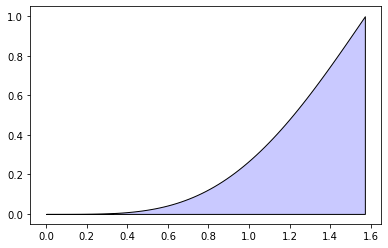

In [99]:
a = linspace(0,pi/2,77)
plt.figure(figsize=(2*pi,4))
plt.fill_between(a,1-3*cos(a)/2 + cos(a)**3/2,fc=(.3,.3,1,.3),ec='k');

In [33]:
alpha = 23.5*pi/180
R = 6371
M = 5.92e24

In [92]:
(1-3*cos(alpha)/2 + cos(alpha)**3/2)*M/2

2.9698490214032138e+22

In [38]:
tplquad(lambda rho, ph, th: rho**2*sin(ph),0,2*pi,0,alpha,lambda th,ph: R*cos(alpha)/cos(ph),R)[0]/(pi*R**3*4/3) * M

2.969849021403217e+22

## Exercise

Set up a triple integral to find the volume of a torus with radii $a < b$.

In [9]:
@interact
def _(angle=(0,90,6)):
    tilt = 23.5*pi/180
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    ax.view_init(angle,30)
    u = v = np.linspace(0,1,100)
    u,v = np.meshgrid(u,v)

    ax.plot_wireframe((1+1/2*sin(2*pi*u))*cos(2*pi*v),(1+1/2*sin(2*pi*u))*sin(2*pi*v),(1/2*cos(2*pi*u)),alpha=1,rcount=10,ccount = 10)
    ax.plot_surface((1+1/2*sin(2*pi*u))*cos(2*pi*v),(1+1/2*sin(2*pi*u))*sin(2*pi*v),(1/2*cos(2*pi*u)),alpha=.3,color='g')
    ax.plot([-1.5,1.5],[0,0],[0,0],'k',lw=3)
    ax.plot([0,0],[-1.5,1.5],[0,0],'k',lw=3)
    ax.plot([0,0],[0,0],[-1.5,1.5],'k',lw=3)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(IntSlider(value=42, description='angle', max=90, step=6), Output()), _dom_classes=('widg…

HW 10 exercise.